# **Random Forest Regression**

Random Forest bir Ensemble Learning üyesidir.

**Ensemble Learning**: Aynı anda birçok machine learning algoritmasını kullanarak ortalamalarını alır ve bir model oluşturur.

Ensemble Learning algoritmaları birden çok algoritmayı birleştirdiği için çok güçlü algoritmalardır. 

Random Forest, decision tree’lerin ortalamasından bir model oluşturur.

Random Forest algoritmasında, datadan n tane sample seçilerek bir **sub_data** oluşturulur.

Oluşturulan sub_data belirlenen sayıda **decision tree** ile eğitilir.

Her bir decision tree'den bir sonuç ortaya çıkar.

Decision tree'lerden çıkan değerlerin ortalaması alınarak random forest modelinin sonucu oluşturulur. Bu işlem tekrar başa dönüp tekrarlanarak oluşturulan model güçlendirilir.

Random forest algoritması dizi, film öneren siteler gibi recommendation systemlerde, body-part classificationda, stock price predictionda kullanılır.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kullanıcak data tribünlerdeki koltukların seviyeleri ve fiyatlarından oluşmaktadır.

Koltuk seviyeleri x feature'ını, koltuk fiyatları y label'ını oluşturmaktadır.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data/random+forest+regression+dataset.csv", sep=";", header=None)
#datada sütunların adları olmadığından header=None kullanılmazsa ilk satırı sütun adları olarak alır.

In [3]:
df

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [4]:
x = df.iloc[:,0].values.reshape(-1,1) 
y = df.iloc[:,1].values.reshape(-1,1)#values methodu ile pandas series array'e çavrilip, reshape methodu ile 1 sütundan oluştuğu sklearn'e bildirilir.

In [5]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100 , random_state=42) # RandomForestRegressor modeli rf adlı variable'a eşitlenir.

**n_estimators** parametresi ile random forest modelinde kullanılacak decision tree'lerin sayıları belirlenir.

Datanın içinden seçilecek sub_data random bir şekilde seçilir.

Eğer bir sub_data değeri belirlenmezse kod her çalıştırıldığında seçilen sub_data değeri değişeceğinden sonuç değişir.

**random_state** parametresi ile datanın içinden ne kadar sub_data seçileceği belirlenir ve her seferinde data aynı şekilde bölünür. Böylelikle kod her çalıştırıldığında aynı sonuç elde edilmiş olur.

In [6]:
rf.fit(x,y) #x ve y değerleri kullanılarak model fit edilir.
print("7.8 seviyesinde fiyat değeri: ",rf.predict([[7.8]])) #oluşturulan modele göre prediction yapılır.

7.8 seviyesinde fiyat değeri:  [22.7]


In [7]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)  
#x değerleri 1-10 arasındadır.
#plotta bir leaf'teki tüm x değerlerinin aynı sonucu vermesi için minimum x değerinden maximum x değerine kadar 0.01 aralıklar ile sayılar üretilir.

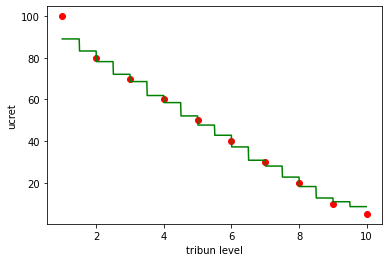

In [8]:
y_head = rf.predict(x_)  #x değerlerine karşılık gelen y değerleri predict edilir ve bu yapılan prediction'ın görselleştirmesi yapılır.
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("tribun level")
plt.ylabel("ucret")
plt.show()

Random Forest'ta yüz tane Decision Tree kullanılırken, decision tree'de 1 tane kullanılır. Bu yüzden Random Forest decision tree'den daha iyi sonuçlar verir.